# Análisis de resultados de simulaciones aleatorias

Partiremos creando funciones que permitan importar un archivo de soluciones y procesarlo.

In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

Se obtienen estadísticos generales de las distribuciones para grupos de simulaciones con parámetros similares y comparables. Se obtienen los estadísticos de media, mediana y máximo para cada grafo generado aleatoriamente.

In [4]:
def get_statics(file_path_list):
    for file_path in file_path_list:
        with open(file_path) as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines]

        clean = list()
        noise = list()
        for i in range(len(lines[:-1])):
            x = list(map(int, lines[i].split(" ")))
            extra_edges =  i%2
            if extra_edges:
                # (media, mediana, máximo)
                noise.append((sum(x)/ len(x), statistics.median(x), max(x)))
            else:
                clean.append((sum(x)/ len(x), statistics.median(x), max(x)))
    return clean, noise

In [5]:
path  = '../data_random/Results/res_7139_2000_10_5.txt'
clean, noise = get_statics([path])

Generamos funciones para plotear la distribución de los máximos, medias y medianas

In [6]:
def plot_mean(clean, noise):
    clean = [i[0] for i in clean]
    noise = [i[0] for i in noise]
    plt.hist(clean, density=True, bins=30, color = "skyblue", alpha=0.5)  # density=False would make counts
    plt.hist(noise, density=True, bins=30, color = "red", alpha=0.5)  #
    plt.ylabel('Frecuencia')
    plt.xlabel('Iteraciones promedio');
    plt.plot()
    print(f'Promedio de árboles: {round(sum(clean)/ len(clean), 2)}')
    print(f'Promedio de árboles con incertidumbre: {round(sum(noise)/ len(noise), 2)}')
    
def plot_median(clean, noise):
    clean = [i[1] for i in clean]
    noise = [i[1] for i in noise]
    plt.hist(clean, density=True, bins=30, color = "skyblue", alpha=0.5)  # density=False would make counts
    plt.hist(noise, density=True, bins=30, color = "red", alpha=0.5)
    plt.ylabel('Frecuencia')
    plt.xlabel('Iteraciones promedio');
    plt.plot()
    print(f'Promedio de árboles: {round(sum(clean)/ len(clean), 2)}')
    print(f'Promedio de árboles con incertidumbre: {round(sum(noise)/ len(noise), 2)}')
    
def plot_max(clean, noise):
    clean = [i[2] for i in clean]
    noise = [i[2] for i in noise]
    plt.hist(clean, density=True, bins=30, color = "skyblue", alpha=0.5)  # density=False would make counts
    plt.hist(noise, density=True, bins=30, color = "red", alpha=0.5)
    plt.ylabel('Frecuencia')
    plt.xlabel('Iteraciones promedio')
    plt.plot()
    print(f'Promedio de árboles: {round(sum(clean)/ len(clean), 2)}')
    print(f'Promedio de árboles con incertidumbre: {round(sum(noise)/ len(noise), 2)}')

Promedio de árboles: 4.5
Promedio de árboles con incertidumbre: 4.68


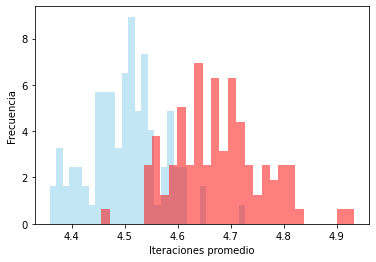

In [7]:
plot_mean(clean, noise)v

Promedio de árboles: 4.54
Promedio de árboles con incertidumbre: 4.99


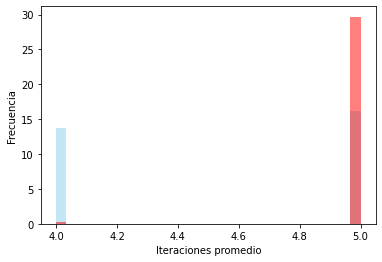

In [8]:
plot_median(clean, noise)

Promedio de árboles: 5.1
Promedio de árboles con incertidumbre: 5.66


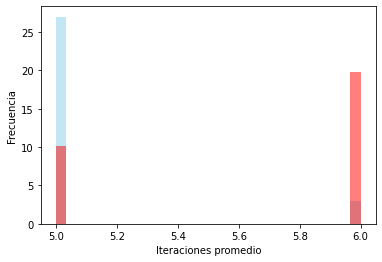

In [9]:
plot_max(clean, noise)

In [51]:
def plot_differences(file_path_list):
    dif = list()
    for file_path in file_path_list:
        with open(file_path) as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines] 
        for i in range(1, len(lines[:-1]) , 2):
            noise = list(map(int, lines[i].split(" ")))
            clean = list(map(int, lines[i-1].split(" ")))
            dif.append([n - c for n,c in zip(noise, clean)])
    dif = [item for sublist in dif for item in sublist]
    plt.hist(dif, density=True, color = "skyblue", alpha=0.5)  # density=False would make counts
    return dif

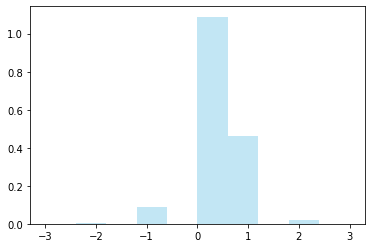

In [52]:
dif = plot_differences(paths)

Graficamos la distribución de las diferencias de las medias de los árboles y los grafos con aristas extras

In [55]:
def plot_mean_differences(clean, noise):
    dif = [n[0] - c[0] for c,n in zip(clean, noise)]
    plt.hist(dif, density=True, bins=30, color = "skyblue", alpha=0.5)  # density=False would make counts
    plt.ylabel('Frecuencia')
    plt.xlabel('Diferencias promedio');
    plt.plot()
    print(f'Promedio de diferencias: {round(sum(dif)/ len(dif), 2)}')


Promedio de diferencias: 0.3


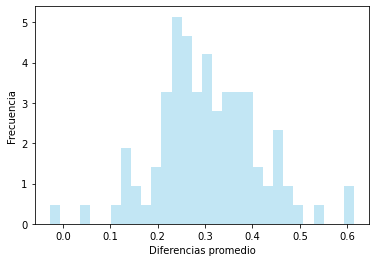

In [56]:
plot_mean_differences(clean, noise)

Vemos la distribución con otro archivo que contiene más incertidumbre. Los resultados son consistentes y se ve una peque

Promedio de árboles: 4.5
Promedio de árboles con incertidumbre: 4.8


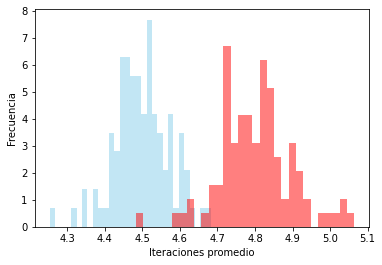

In [57]:
paths  = [ '../data_random/Results/res_7139_2000_10_20.txt']
clean, noise = get_statics(paths)
plot_mean(clean, noise)

Promedio de árboles: 4.5
Promedio de árboles con incertidumbre: 4.8


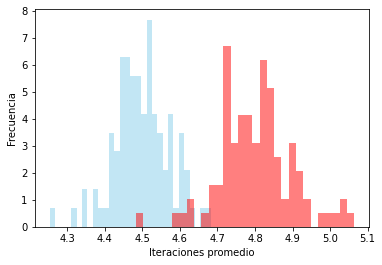

In [54]:
plot_mean(clean, noise)